<a href="https://colab.research.google.com/github/renan-ras/LH_CD/blob/main/LH_CD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files

In [2]:
import pandas as pd

In [262]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import re

In [6]:
from nltk import ngrams
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [252]:
import pickle

Carregando nosso dataset

In [ ]:
filepath = '/content/drive/My Drive/Indicium/Lighthouse/Ciencia de Dados/teste_indicium_precificacao.csv'

In [8]:
df = pd.read_csv(filepath)

# Visão geral dos dados

In [9]:
df

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [11]:
# Checando se há dados duplicados
df.duplicated().sum()

0

In [12]:
# Ajusta a opção de exibição para arredondar para duas casas decimais e evitar a notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# pd.reset_option('display.float_format') # reverter para o padrão original de exibição

In [13]:
df[[
    'price',
    'minimo_noites',
    'numero_de_reviews',
    'reviews_por_mes',
    'calculado_host_listings_count',
    'disponibilidade_365'
]].describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.00,48894.00,48894.00,38842.00,48894.00,48894.00
mean,152.72,7.03,23.27,1.37,7.14,112.78
std,240.16,20.51,44.55,1.68,32.95,131.62
min,0.00,1.00,0.00,0.01,1.00,0.00
25%,69.00,1.00,1.00,0.19,1.00,0.00
50%,106.00,3.00,5.00,0.72,1.00,45.00
75%,175.00,5.00,24.00,2.02,2.00,227.00
max,10000.00,1250.00,629.00,58.50,327.00,365.00


In [14]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [15]:
df.bairro_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [16]:
df.bairro.unique().size

221

# Ajustes

## Eliminar preços zerados

Preços zerados não fazem sentido, principalmente em um modelo de previsão de preços.

In [17]:
# Quantidade de listagens com preço zerado
print(f"{(df['price']==0).sum()} registros sem preço entre {len(df)}") # -> 11 registros sem preço entre 48894

11 registros sem preço entre 48894


In [18]:
# Excluindo registros com preço zerado
df = df[df['price'] != 0].copy()
print(f"{(df['price']==0).sum()} registros sem preço entre {len(df)}") # -> 0 registros sem preço entre 48883

0 registros sem preço entre 48883


## Verificando NaNs

In [19]:
# Contagem de NaNs por coluna
df.isna().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10051
reviews_por_mes                  10051
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [20]:
# Substituir NaNs em nome e host_name por 'Sem Nome'
df['nome'].fillna('Sem Nome', inplace=True)
df['host_name'].fillna('Sem Nome', inplace=True)

Verificar se todos os NaNs em 'ultima_review' e 'reviews_por_mes' são devido a terem zero reviews

In [21]:
# Verificando quantidade de linhas com zero reviews
(df['numero_de_reviews'] == 0).sum()

10051

In [22]:
# Selecionar linhas onde 'numero_de_reviews' é igual a 0
linhas_zero_reviews = df[df['numero_de_reviews'] == 0]

# Verificar se todas essas linhas têm 'NaN' em 'ultima_review' e 'reviews_por_mes'
verificacao_ultima_review = linhas_zero_reviews['ultima_review'].isna().all()
verificacao_reviews_por_mes = linhas_zero_reviews['reviews_por_mes'].isna().all()

print("Todas as linhas com 'numero_de_reviews' igual a 0 têm 'ultima_review' como NaN:", verificacao_ultima_review)
print("Todas as linhas com 'numero_de_reviews' igual a 0 têm 'reviews_por_mes' como NaN:", verificacao_reviews_por_mes)


Todas as linhas com 'numero_de_reviews' igual a 0 têm 'ultima_review' como NaN: True
Todas as linhas com 'numero_de_reviews' igual a 0 têm 'reviews_por_mes' como NaN: True


In [23]:
# Conversão de formato object para datetime
df['ultima_review'] = pd.to_datetime(df['ultima_review'])

Setar 'reviews_por_mes' igual a zero para valores NaN (que por consequência tem 'numero_de_reviews' igual a zero).

In [24]:
# Verifica quantidade atual de NaNs
(df['reviews_por_mes'].isna()).sum()

10051

In [25]:
df['reviews_por_mes'].fillna(0, inplace=True) # substitui NaN com 0
(df['reviews_por_mes'].isna()).sum() # conferir se deu certo

0

# Lucro anual

Assumindo que o imóvel seja exclusivo para aluguel e quando não está disponível está alugado pelo preço informado, podemos calcular o lucro bruto anual de cada anúncio da seguinte forma -> price*(365 - disponibilidade_365)

In [26]:
df['lucro_anual'] = df['price'] * (365 - df['disponibilidade_365'])

In [27]:
df['lucro_anual'].describe()

count     48883.00
mean      35941.30
std       61391.27
min           0.00
25%       12775.00
50%       25550.00
75%       45625.00
max     3650000.00
Name: lucro_anual, dtype: float64

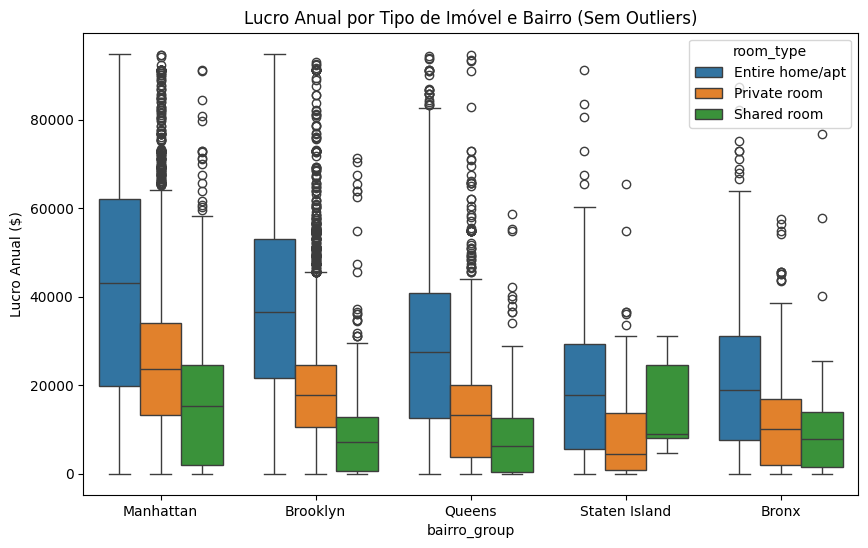

In [28]:
# Removendo Outliers para melhor visualização do gráfico

# Calculando o IQR
Q1 = df['lucro_anual'].quantile(0.25)
Q3 = df['lucro_anual'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites para os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando os outliers
df_filtered = df[(df['lucro_anual'] >= limite_inferior) & (df['lucro_anual'] <= limite_superior)]

# Criando o boxplot com os dados filtrados
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='bairro_group', y='lucro_anual', hue='room_type', data=df_filtered)

plt.title('Lucro Anual por Tipo de Imóvel e Bairro (Sem Outliers)')
plt.ylabel('Lucro Anual ($)')

plt.show()

In [29]:
# Calcula a média do lucro anual por bairro e tipo de imóvel
media_lucro = df.groupby(['bairro_group', 'room_type'])['lucro_anual'].mean()

# Transforma a série em um DataFrame e realiza a transposição
media_lucro.unstack().transpose()

bairro_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,24186.60,45187.71,56558.58,30549.84,27061.01
Private room,12503.14,19437.98,27979.69,15539.82,8900.21
Shared room,10677.85,10207.21,21626.44,14602.54,14242.00


**Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?**
O maior lucro em média é de um 'Entire home/apt' em Manhattan (US\$56558.58/ano) seguido do mesmo tipo de imóvel no Brooklyn (US\$45187.71/ano). Entretanto não há informações sobre o valor desses imóveis, o que seria fundamental para calcularmos o retorno sobre o investimento.



> *O apartamento médio em Manhattan custa cerca de \$1,25 milhões¹, em junho de 2023, enquanto a cobertura média pode custar cerca de \$9 milhões. No entanto, você pode esperar pagar cerca de \$17 milhões a \$40 milhões por uma cobertura de primeira linha.*

¹ Dados de UrbanDigs



# Última Review

Um review recente passa mais confiança do que um review muito antigo. Para analisar esse possível impacto criarei uma coluna com o tempo desde a última review. Como os dados são antigos, vou tomar a review mais recente como base para comparação das demais.

In [30]:
# Dias desde a revisão mais recente
df['dias_desde_ultima_review'] = (df['ultima_review'].max() - df['ultima_review']).dt.days

In [31]:
df['ultima_review']

0       2019-05-21
1              NaT
2       2019-07-05
3       2018-11-19
4       2019-06-22
           ...    
48889          NaT
48890          NaT
48891          NaT
48892          NaT
48893          NaT
Name: ultima_review, Length: 48883, dtype: datetime64[ns]

In [32]:
# Encontrar a data máxima (mais recente)
max_date = df['ultima_review'].max()

# Encontrar a data mínima (mais antiga)
min_date = df['ultima_review'].min()

print(f"A data mais recente é: {max_date}")
print(f"A data mais antiga é: {min_date}")

A data mais recente é: 2019-07-08 00:00:00
A data mais antiga é: 2011-03-28 00:00:00


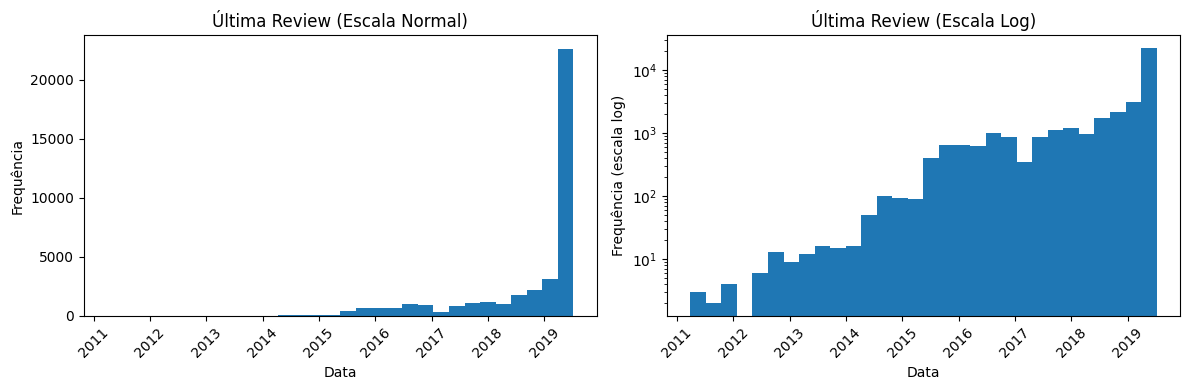

In [33]:
# Removendo valores NaT da coluna 'ultima_review'
df_clean = df.dropna(subset=['ultima_review'])

# Configurando a figura para ter 2 subplots lado a lado
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Histograma com escala normal
axes[0].hist(df_clean['ultima_review'], bins=30)
axes[0].set_title('Última Review (Escala Normal)')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Frequência')
axes[0].tick_params(axis='x', rotation=45)

# Histograma com escala log
axes[1].hist(df_clean['ultima_review'], bins=30)
axes[1].set_yscale('log')
axes[1].set_title('Última Review (Escala Log)')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Frequência (escala log)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout() # Ajuste automatico
plt.show()

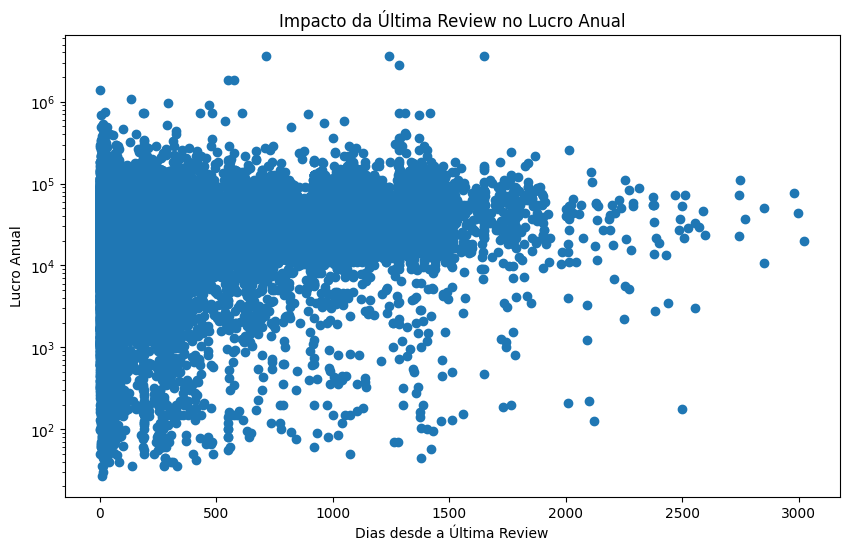

In [34]:
#import matplotlib.dates as mdates

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['dias_desde_ultima_review'], df['lucro_anual'])
plt.yscale('log')
plt.title('Impacto da Última Review no Lucro Anual')
plt.xlabel('Dias desde a Última Review')
plt.ylabel('Lucro Anual')

plt.show()

In [35]:
df['dias_desde_ultima_review'].corr(df['lucro_anual'])

0.11505550998832477

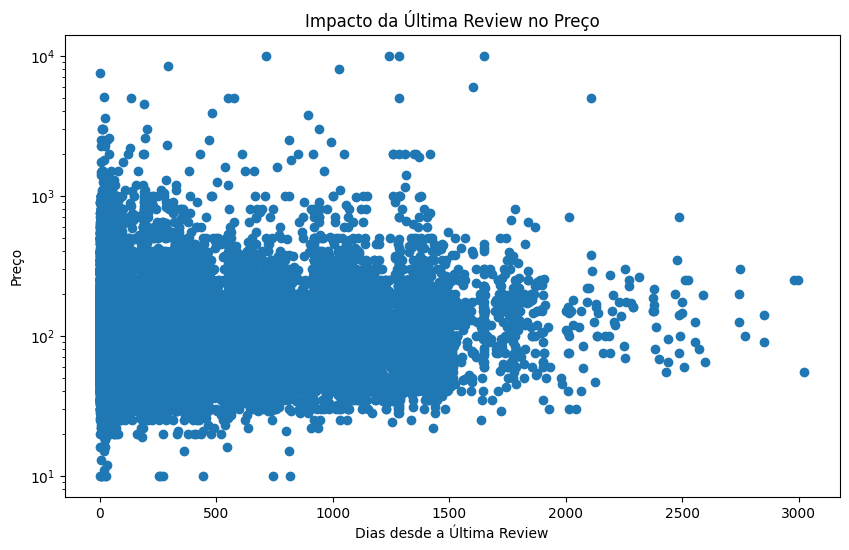

In [36]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['dias_desde_ultima_review'], df['price'])
plt.yscale('log')
plt.title('Impacto da Última Review no Preço')
plt.xlabel('Dias desde a Última Review')
plt.ylabel('Preço')

plt.show()

In [37]:
df['dias_desde_ultima_review'].corr(df['price'])

0.016773574553155843

Não parece haver uma correlação significativa entre a data da última review e o preço ou o lucro dos imóveis.

# Preços

Frequência de cada faixa de preço

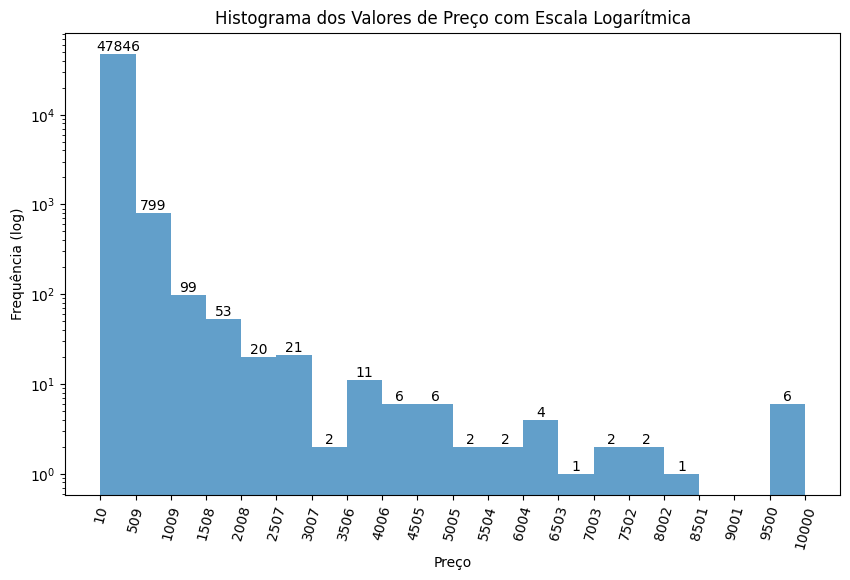

In [38]:
plt.figure(figsize=(10, 6))
# Cria o histograma e retorna os valores das frequências, as bordas dos bins e as barras
n, bins, patches = plt.hist(df['price'], bins=20, alpha=0.7, log=True)

# Adiciona o título e os rótulos dos eixos
plt.title('Histograma dos Valores de Preço com Escala Logarítmica')
plt.xlabel('Preço')
plt.ylabel('Frequência (log)')

# Define os rótulos do eixo x para corresponder às bordas dos bins
plt.xticks(bins, [f"{int(bin)}" for bin in bins])

# Loop através dos patches (barras) do histograma
for i in range(len(patches)):
    # Obter a posição de x, y para colocar a anotação (no topo da barra)
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()

    # Verifica se a altura da barra é maior que zero (para não anotar barras vazias)
    if y > 0:
        # Usa a função text() para adicionar a frequência acima de cada barra
        plt.text(x, y, str(int(n[i])), ha='center', va='bottom')

plt.xticks(rotation=75) # Rotaciona os rótulos do eixo x para que eles não se sobreponham
plt.show()


In [39]:
(df['price'] <= 509).sum()/len(df)*100

97.8786081050672

**Quase 98% das listagens têm preços entre 10 e 509 dólares.**
Como Nova York é uma das cidades mais caras do mundo, com imóveis podendo valer centenas de milhões de dólares, e como não temos informações sobre o tamanho desses imóveis, é possível sim que tenhamos valores muito altos. Além do mais, como estes imóveis correspondem a apenas 2% do total, pretendo mantê-los na base de dados.



---



Para melhorar a visualização alguns gráficos consideram preços até o 98° ou 90º percentil.

In [40]:
# Calcula o valor do 98º percentil para a coluna 'price'
percentil_98 = df['price'].quantile(0.98)

# Filtra o DataFrame para manter apenas as linhas onde o 'price' é menor ou igual ao percentil 98
df_price_98 = df[df['price'] <= percentil_98]

In [41]:
# Calcula o valor do 90º percentil para a coluna 'price'
percentil_90 = df['price'].quantile(0.90)

# Filtra o DataFrame para manter apenas as linhas onde o 'price' é menor ou igual ao percentil 90
df_price_90 = df[df['price'] <= percentil_90]

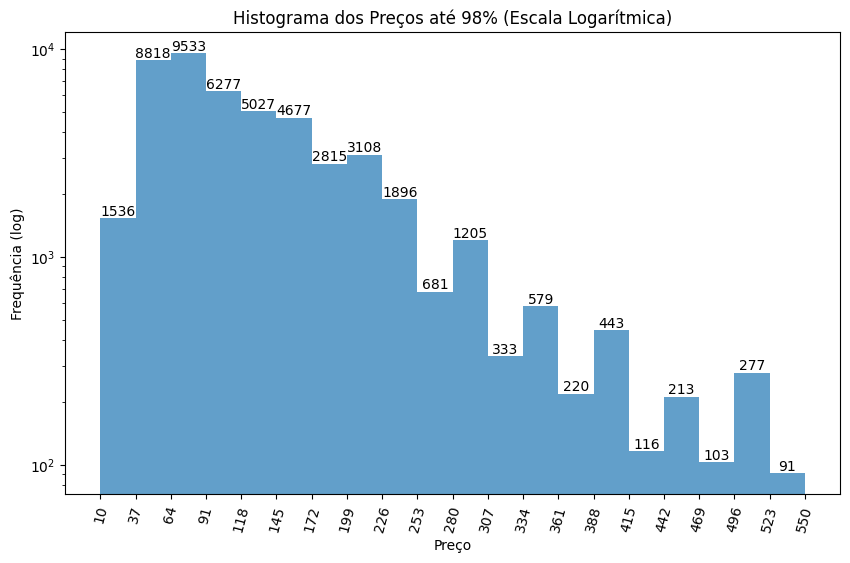

In [42]:
plt.figure(figsize=(10, 6))
# Cria o histograma e retorna os valores das frequências, as bordas dos bins e as barras
n, bins, patches = plt.hist(df_price_98['price'], bins=20, alpha=0.7, log=True)

# Adiciona o título e os rótulos dos eixos
plt.title('Histograma dos Preços até 98% (Escala Logarítmica)')
plt.xlabel('Preço')
plt.ylabel('Frequência (log)')

# Define os rótulos do eixo x para corresponder às bordas dos bins
plt.xticks(bins, [f"{int(bin)}" for bin in bins])

# Loop através dos patches (barras) do histograma
for i in range(len(patches)):
    # Obter a posição de x, y para colocar a anotação (no topo da barra)
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()

    # Verifica se a altura da barra é maior que zero (para não anotar barras vazias)
    if y > 0:
        # Usa a função text() para adicionar a frequência acima de cada barra
        plt.text(x, y, str(int(n[i])), ha='center', va='bottom')

plt.xticks(rotation=75) # Rotaciona os rótulos do eixo x para que eles não se sobreponham
plt.show()

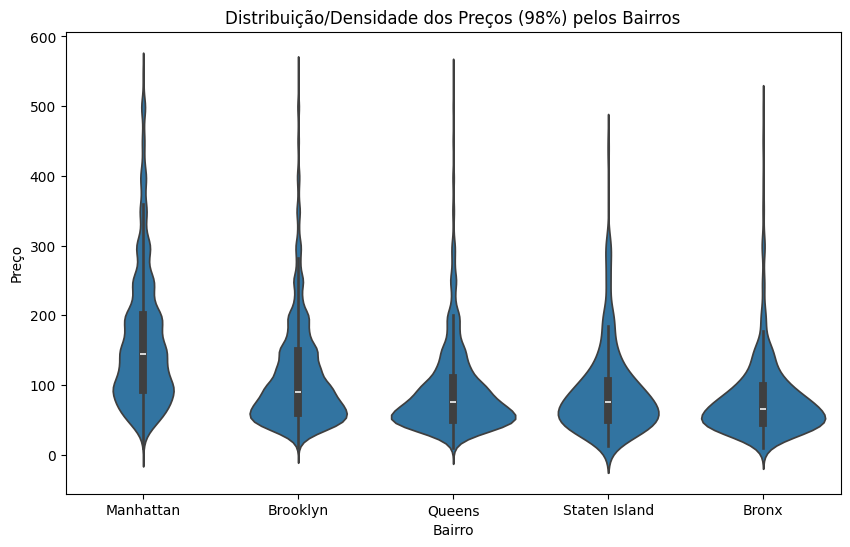

In [43]:
# Criando o gráfico de violino
plt.figure(figsize=(10, 6))
sns.violinplot(x='bairro_group', y='price', data=df_price_98)

plt.title('Distribuição/Densidade dos Preços (98%) pelos Bairros')
plt.xlabel('Bairro')
plt.ylabel('Preço')

plt.show()

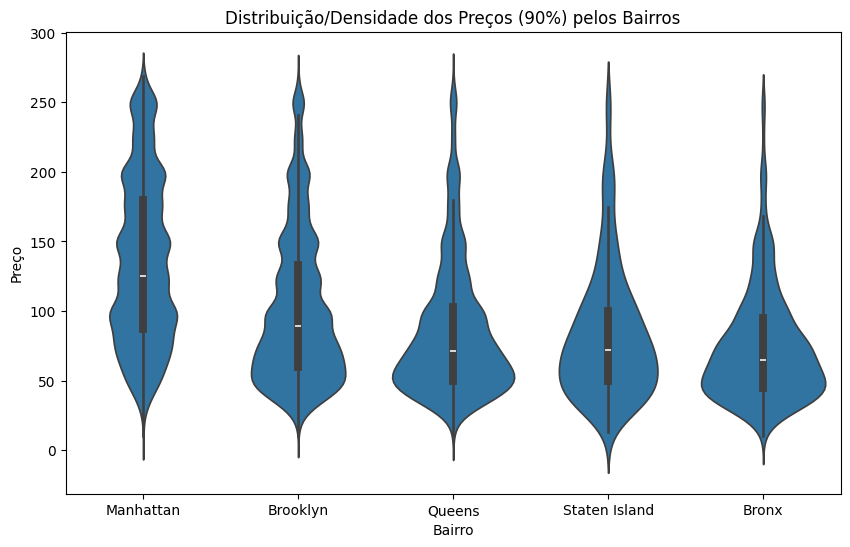

In [44]:
# Criando o gráfico de violino
plt.figure(figsize=(10, 6))
sns.violinplot(x='bairro_group', y='price', data=df_price_90)

plt.title('Distribuição/Densidade dos Preços (90%) pelos Bairros')
plt.xlabel('Bairro')
plt.ylabel('Preço')

plt.show()

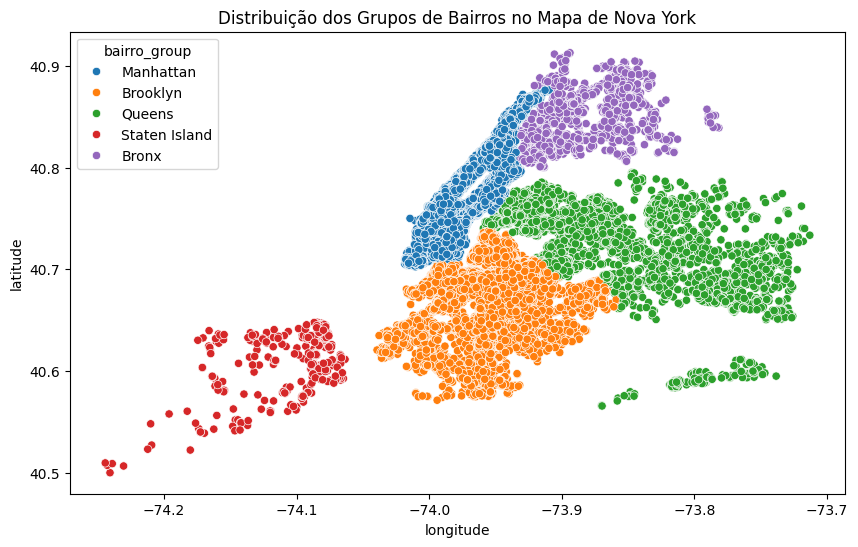

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='bairro_group', data=df_price_90)
plt.title('Distribuição dos Grupos de Bairros no Mapa de Nova York')
plt.show()

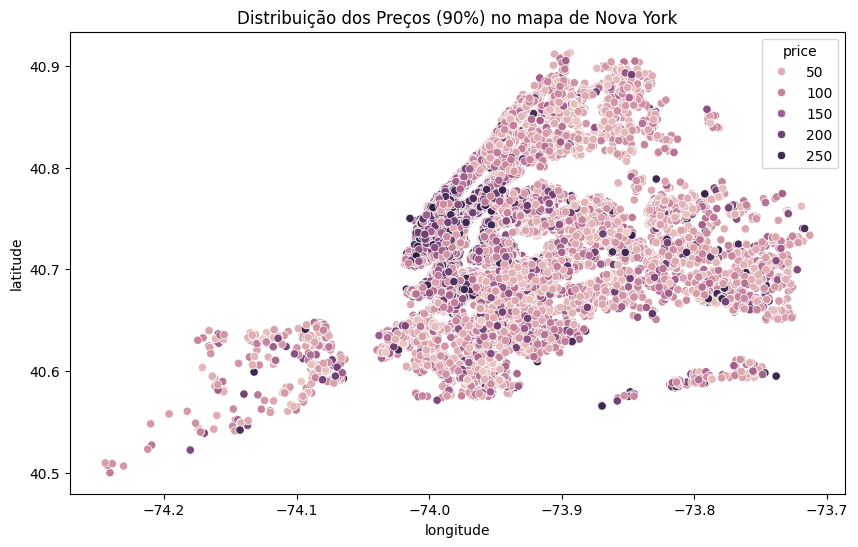

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='price', data=df_price_90)
plt.title('Distribuição dos Preços (90%) no mapa de Nova York')
plt.show()

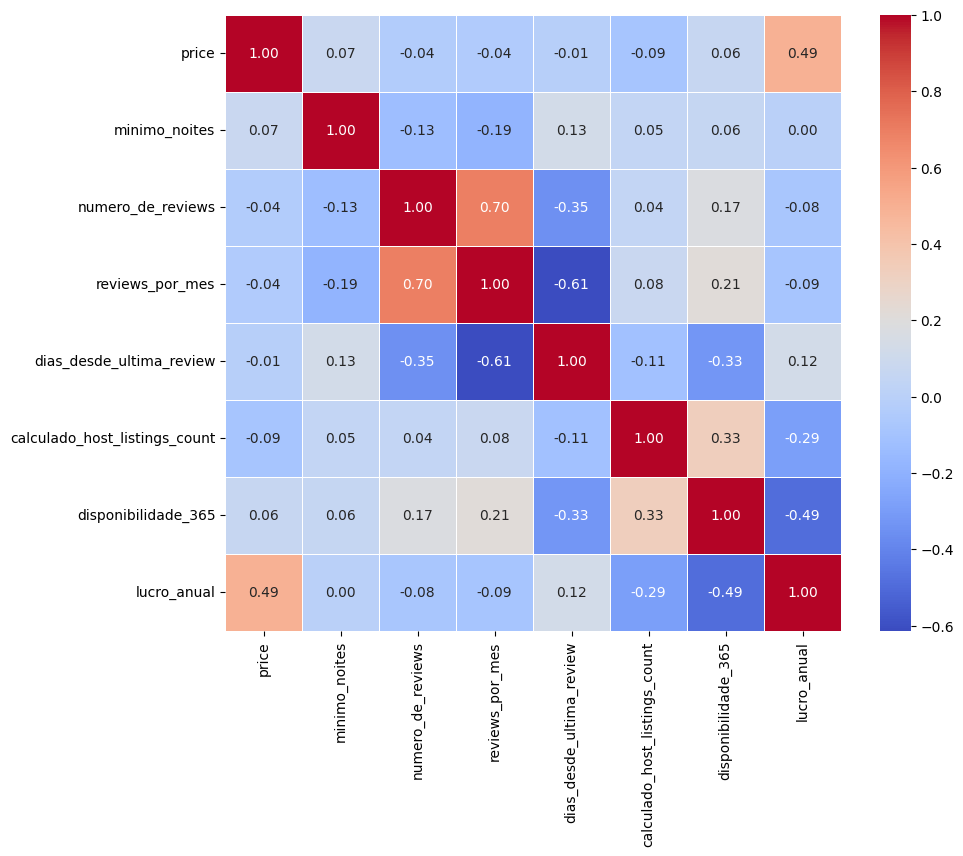

In [47]:
# Selecionando um subconjunto de colunas de interesse
colunas_de_interesse = ['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'dias_desde_ultima_review',
                        'calculado_host_listings_count', 'disponibilidade_365', 'lucro_anual']

# Calculando a correlação apenas entre as colunas selecionadas
corr_subset = df[colunas_de_interesse].corr(method='kendall', numeric_only=True)

# Plotando o heatmap da matriz de correlação do subset
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.show()


In [48]:
# Lista de colunas numéricas (excluindo 'price')
colunas_numéricas = df.select_dtypes(include=['int64', 'float64']).columns.drop('price')

# Calculando a correlação de 'price' com cada coluna numérica
correlacoes = df[['price'] + list(colunas_numéricas)].corr(method='kendall')['price'].drop('price')

print(correlacoes.sort_values(ascending=False))

lucro_anual                      0.49
latitude                         0.09
minimo_noites                    0.07
disponibilidade_365              0.06
dias_desde_ultima_review        -0.01
id                              -0.02
numero_de_reviews               -0.04
reviews_por_mes                 -0.04
host_id                         -0.05
calculado_host_listings_count   -0.09
longitude                       -0.30
Name: price, dtype: float64


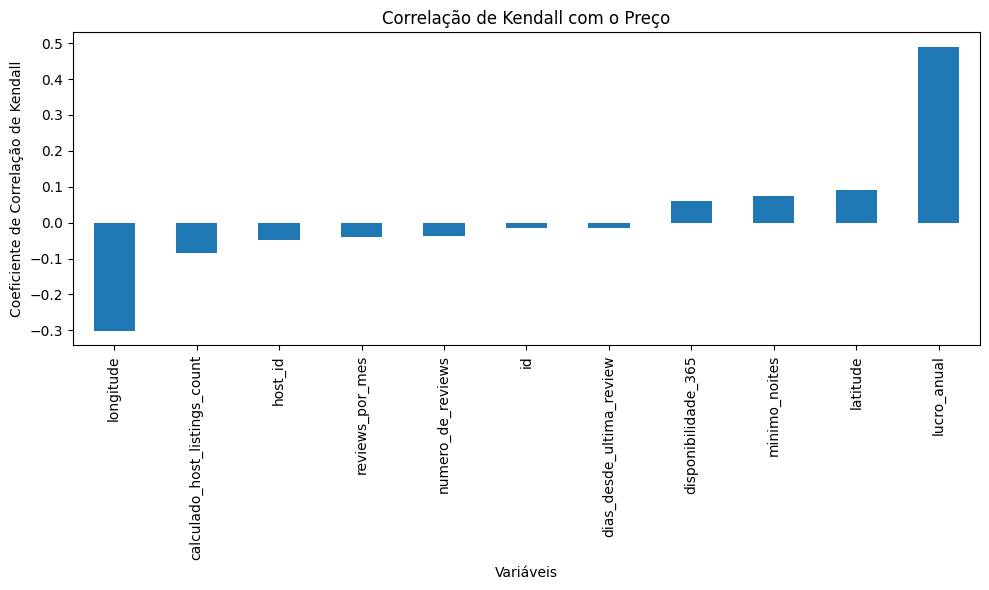

In [49]:
plt.figure(figsize=(10, 6))
correlacoes.sort_values().plot(kind='bar')
plt.title('Correlação de Kendall com o Preço')
plt.xlabel('Variáveis')
plt.ylabel('Coeficiente de Correlação de Kendall')
plt.tight_layout()
plt.show()

Vemos que latitude, longitude, minimo_noites e disponibilidade_365 são os que mais afetam os preços. Mais detalhes quando fizermos nosso modelo preditivo.

# Análise do Nome


Preparação do texto

In [50]:
# Converter para minúsculas
df['nome'] = df['nome'].str.lower()

# Substituir pontuação por espaço
df['nome'] = df['nome'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

# Remover espaços múltiplos
df['nome'] = df['nome'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

Definir categorias de preço

Dividi os valores de preço em quatro categorias:


*   baixo, até o percentil 50 (mediana);
*   medio, até o percentil 90;
*   alto, até o percentil 98;
*   muito alto, acima do percentil 98.





In [51]:
# Calcular os quantis
q50 = df['price'].quantile(0.50) #106
q90 = df['price'].quantile(0.90) #269
q98 = df['price'].quantile(0.98) #550

# Definir os limites das categorias, incluindo o mínimo e máximo dos preços para garantir cobertura total
limites = [df['price'].min()-1, q50, q90, q98, df['price'].max()]

# Definir os rótulos das categorias
categorias = ['baixo', 'medio', 'alto', 'muito alto']

# Categorizar os preços
df['categoria_preco'] = pd.cut(df['price'], bins=limites, labels=categorias, include_lowest=True)

# Verificar a distribuição das novas categorias de preço
print(df['categoria_preco'].value_counts())


baixo         24461
medio         19544
alto           3943
muito alto      935
Name: categoria_preco, dtype: int64


Contagem de Palavras

In [52]:
# Contagem de palavras para a categoria de preço muito alto
texto_muito_alto = ' '.join(df[df['categoria_preco'] == 'muito alto']['nome'])
palavras_muito_alto = word_tokenize(texto_muito_alto)
contador_muito_alto = Counter(palavras_muito_alto)

In [71]:
# Contagem de palavras para a categoria de preço alto
texto_alto = ' '.join(df[df['categoria_preco'] == 'alto']['nome'])
palavras_alto = word_tokenize(texto_alto)
contador_alto = Counter(palavras_alto)

In [54]:
# Contagem de palavras para a categoria de preço medio
texto_medio = ' '.join(df[df['categoria_preco'] == 'medio']['nome'])
palavras_medio = word_tokenize(texto_medio)
contador_medio = Counter(palavras_medio)

In [70]:
# Contagem de palavras para a categoria de preço baixo
texto_baixo = ' '.join(df[df['categoria_preco'] == 'baixo']['nome'])
palavras_baixo = word_tokenize(texto_baixo)
contador_baixo = Counter(palavras_baixo)

## Preço alto vs baixo

In [72]:
# Converter em Conjuntos para Comparação
conjunto_baixo = set([palavra for palavra, contagem in contador_baixo.most_common(50)])
conjunto_alto = set([palavra for palavra, contagem in contador_alto.most_common(50)])

In [73]:
# Palavras mais presentes em 'baixo' do que em 'alto'
exclusivas_baixo = conjunto_baixo - conjunto_alto

# Palavras mais presentes em 'alto' do que em 'baixo'
exclusivas_alto = conjunto_alto - conjunto_baixo

In [74]:
print("Palavras exclusivas em locais de preço baixo:", exclusivas_baixo)
print("Palavras exclusivas em locais de preço alto:", exclusivas_alto)

Palavras exclusivas em locais de preço baixo: {'bushwick', 'min', 'room', 'bright', 'harlem', 'close', 'for', 'subway', 'charming', 'sunny', 'cozy', 'from', 'quiet', 'clean', 'great', 'train', 'a', 'heights'}
Palavras exclusivas em locais de preço alto: {'times', 'gym', 'duplex', 'luxury', 'by', 'views', '3', '1br', 'square', 'west', 'doorman', 'br', '2br', 'midtown', 'bath', 'chelsea', 'blueground', 'village'}


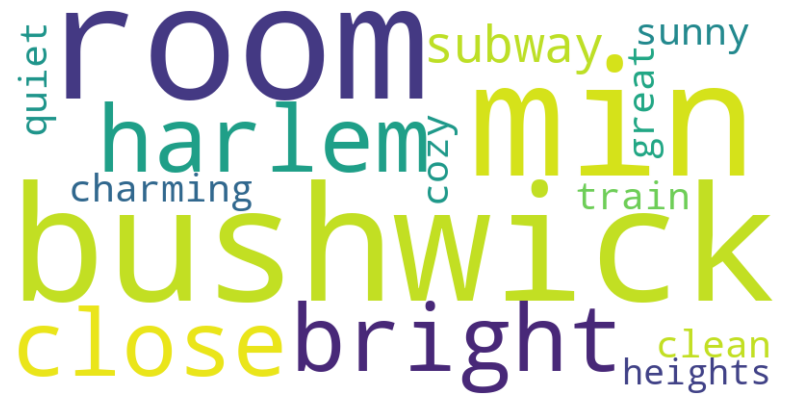

In [59]:
# Criar a word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=50).generate(' '.join(exclusivas_baixo))

# Mostrar a word cloud usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Não mostrar os eixos para uma visualização melhor
plt.show()

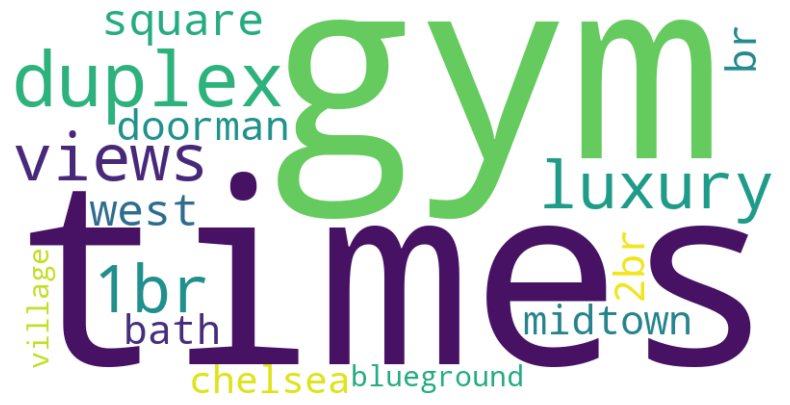

In [60]:
# Criar a word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=50).generate(' '.join(exclusivas_alto))

# Mostrar a word cloud usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Não mostrar os eixos para uma visualização melhor
plt.show()

Dentre as 50 palavras mais comuns nos anúncios de preços altos vs baixos, 18 são exclusivas de cada grupo. Dessas destaco para preço baixo: 'train' (trem), 'subway' (metrô), 'quiet' (silencioso), 'cozy' (aconchegante), 'bright' (iluminado), além do bairro 'Harlem'; Para imóveis de preço alto destaco: 'duplex', 'doorman' (porteiro), 'luxury' (luxo), 'gym' (academia), '2br' (dois quartos), além do bairro 'midtown' (centro da cidade).

## n-grams - preço alto vs baixo

In [61]:
# Função para extrair n-grams
def extrair_ngrams(data, num=2):
    n_grams = ngrams(word_tokenize(data), num)
    return [' '.join(grams) for grams in n_grams]

In [62]:
# Dicionário para armazenar contadores de n-grams para cada categoria
contadores_ngrams = {
    'baixo': Counter(),
    'medio': Counter(),
    'alto': Counter(),
    'muito alto': Counter()
}

# Iterar por cada categoria de preço
for categoria in contadores_ngrams.keys():
    # Concatenar todos os nomes na categoria
    texto_categoria = ' '.join(df[df['categoria_preco'] == categoria]['nome'])

    # Extrair bigrams
    ngrams_categoria = extrair_ngrams(texto_categoria, num=2)

    # Atualizar o contador de n-grams para a categoria
    contadores_ngrams[categoria].update(ngrams_categoria)

In [63]:
# Visualizar os bigrams mais comuns para a categoria 'alto'
print(contadores_ngrams['alto'].most_common(10))

[('2 bedroom', 211), ('central park', 177), ('heart of', 169), ('by blueground', 166), ('in the', 149), ('east village', 130), ('apartment in', 129), ('west village', 125), ('apt in', 117), ('times square', 117)]


In [64]:
# Visualizar os bigrams mais comuns para a categoria 'baixo'
print(contadores_ngrams['baixo'].most_common(10))

[('room in', 3829), ('private room', 2525), ('bedroom in', 1604), ('heart of', 832), ('private bedroom', 815), ('cozy room', 790), ('in the', 780), ('in brooklyn', 766), ('close to', 632), ('1 bedroom', 621)]


In [65]:
conjunto_baixo_bi = set([palavra for palavra, contagem in contadores_ngrams['baixo'].most_common(50)])
conjunto_alto_bi = set([palavra for palavra, contagem in contadores_ngrams['alto'].most_common(50)])

In [66]:
# Palavras mais presentes em 'baixo' do que em 'alto'
exclusivas_baixo_bi = conjunto_baixo_bi - conjunto_alto_bi

# Palavras mais presentes em 'alto' do que em 'baixo'
exclusivas_alto_bi = conjunto_alto_bi - conjunto_baixo_bi

In [67]:
print("2 Palavras exclusivas em locais de preço baixo:", exclusivas_baixo_bi)
print("2 Palavras exclusivas em locais de preço alto:", exclusivas_alto_bi)

2 Palavras exclusivas em locais de preço baixo: {'in brooklyn', 'studio in', 'w private', 'sunny room', 'private bathroom', 'in a', 'cozy room', 'room for', 'cozy bedroom', 'room w', 'min to', 'large room', 'and cozy', 'bedroom with', 'close to', 'room in', 'in east', 'room near', 'crown heights', 'room with', 'away from', 'to subway', 'spacious room', 'private room', 'cozy private', 'private bedroom', 'bed stuy', 'prospect park', 'in bushwick'}
2 Palavras exclusivas em locais de preço alto: {'by blueground', '1br w', '2 bedrooms', 'of manhattan', 'greenwich village', '2 bed', 'in midtown', 'bed 2', 'stock exchange', '1 br', 'park slope', '3 bed', '3 bedroom', 'loft in', '2 br', 'w gym', '2 bath', 'bedroom apt', 'doorman by', 's kitchen', 'sonder stock', 'in heart', 'gym doorman', 'brand new', 'hell s', 'doorman gym', 'west village', 'indoor pool', 'in nyc'}


Além de várias referências a bairros de Nova York, destaco as seguintes pecualiaridades do anúncio de cada tipo de imóvel.

Preço Baixo:
*   cozy bedroom (quarto aconchegante)
*   close to (próximo a)
*   away from (longe de)
*   private bathroom (banheiro privativo)
*   private bedroom (quarto privativo)

Preço Alto:
*   indoor pool (piscina interna)
*   3 bedroom (3 quartos)
*   brand new (novo em folha)
*   2 bath (2 banheiros)
*   gym doorman (academia e porteiro)





# Previsão de Preços

In [78]:
len(df.bairro.unique())

221

In [80]:
df.bairro.value_counts().describe()

count    221.00
mean     221.19
std      535.95
min        1.00
25%       10.00
50%       32.00
75%      154.00
max     3919.00
Name: bairro, dtype: float64

In [76]:
df.bairro_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [77]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

## Modelo 1

Aplicando One-Hot Encoding para bairro_group e room_type

In [210]:
# Aplicando One-Hot Encoding para 'bairro_group' e 'room_type'
df_encoded = pd.get_dummies(df, columns=['bairro_group', 'room_type'])

# Verificando as novas colunas criadas
print(df_encoded.columns)

Index(['id', 'nome', 'host_id', 'host_name', 'bairro', 'latitude', 'longitude',
       'price', 'minimo_noites', 'numero_de_reviews', 'ultima_review',
       'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365', 'lucro_anual', 'dias_desde_ultima_review',
       'categoria_preco', 'bairro_group_Bronx', 'bairro_group_Brooklyn',
       'bairro_group_Manhattan', 'bairro_group_Queens',
       'bairro_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')


In [211]:
df_encoded.drop(columns=['id', 'nome', 'host_id', 'host_name', 'categoria_preco', 'lucro_anual', 'bairro', 'ultima_review', 'dias_desde_ultima_review'], inplace=True)

In [213]:
df_encoded

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.75,-73.98,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0
1,40.81,-73.94,150,3,0,0.00,1,365,0,0,1,0,0,0,1,0
2,40.69,-73.96,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0
3,40.80,-73.94,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0
4,40.75,-73.97,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,40.68,-73.95,70,2,0,0.00,2,9,0,1,0,0,0,0,1,0
48890,40.70,-73.93,40,4,0,0.00,2,36,0,1,0,0,0,0,1,0
48891,40.81,-73.95,115,10,0,0.00,1,27,0,0,1,0,0,1,0,0
48892,40.76,-73.99,55,1,0,0.00,6,2,0,0,1,0,0,0,0,1


In [214]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48883 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       48883 non-null  float64
 1   longitude                      48883 non-null  float64
 2   price                          48883 non-null  int64  
 3   minimo_noites                  48883 non-null  int64  
 4   numero_de_reviews              48883 non-null  int64  
 5   reviews_por_mes                48883 non-null  float64
 6   calculado_host_listings_count  48883 non-null  int64  
 7   disponibilidade_365            48883 non-null  int64  
 8   bairro_group_Bronx             48883 non-null  uint8  
 9   bairro_group_Brooklyn          48883 non-null  uint8  
 10  bairro_group_Manhattan         48883 non-null  uint8  
 11  bairro_group_Queens            48883 non-null  uint8  
 12  bairro_group_Staten Island     48883 non-null 

**Aplicação do Modelo Random Forest**

Dividindo os Dados em Treinamento e Teste

In [216]:
# Definindo X (features) e y (target)
X = df_encoded.drop('price', axis=1)  # Removendo a coluna de preços para usar como features
y = df_encoded['price']  # Preços como target

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Treinando o Modelo Random Forest

In [218]:
# Inicializando o modelo Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 árvores na floresta

# Treinando o modelo com o conjunto de treinamento
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Avaliando a Performance do Modelo

In [220]:
# Fazendo previsões no conjunto de teste
y_pred = random_forest_model.predict(X_test)

# Calculando métricas de erro
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 65.40145034264089
MSE: 51782.23904901299
RMSE: 227.5571116203864


Prevendo um preço

In [221]:
df_encoded.columns

Index(['latitude', 'longitude', 'price', 'minimo_noites', 'numero_de_reviews',
       'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365', 'bairro_group_Bronx', 'bairro_group_Brooklyn',
       'bairro_group_Manhattan', 'bairro_group_Queens',
       'bairro_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [222]:
# Criando o vetor de entrada com as características do apartamento
apartamento = {
    'latitude': 40.75362,
    'longitude': -73.98377,
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355,
    'bairro_group_Bronx': 0,
    'bairro_group_Brooklyn': 0,
    'bairro_group_Manhattan': 1,
    'bairro_group_Queens': 0,
    'bairro_group_Staten Island': 0,
    'room_type_Entire home/apt': 1,
    'room_type_Private room': 0,
    'room_type_Shared room': 0
}

In [223]:
# Convertendo o dicionário em um DataFrame para corresponder ao formato esperado pelo modelo
apartamento_df = pd.DataFrame([apartamento])
apartamento_df

,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.75,-73.98,1,45,0.38,2,355,0,0,1,0,0,1,0,0


In [224]:
# Usando o modelo para fazer uma previsão de preço
preco_sugerido = random_forest_model.predict(apartamento_df)

print(f"Preço sugerido: {preco_sugerido[0]}")

Preço sugerido: 283.61


Preço sugerido é de US\$283.61 versus US\$225 do valor real.



---



Visualizar a importância das features de um modelo de Random Forest

                          Feature  Importance
1                       longitude        0.29
0                        latitude        0.23
2                   minimo_noites        0.10
6             disponibilidade_365        0.10
5   calculado_host_listings_count        0.08
12      room_type_Entire home/apt        0.07
4                 reviews_por_mes        0.06
3               numero_de_reviews        0.04
10            bairro_group_Queens        0.01
9          bairro_group_Manhattan        0.01
8           bairro_group_Brooklyn        0.00
14          room_type_Shared room        0.00
11     bairro_group_Staten Island        0.00
13         room_type_Private room        0.00
7              bairro_group_Bronx        0.00


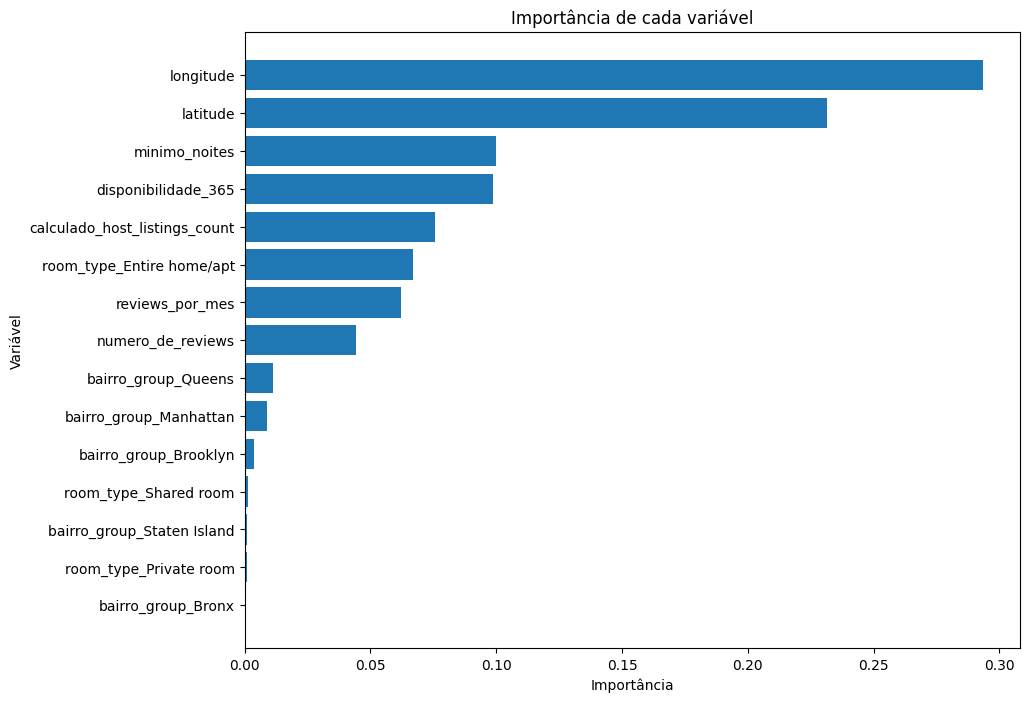

In [226]:
feature_importances = random_forest_model.feature_importances_

# Criando um DataFrame para melhor visualização das importâncias
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenando as features pela importância
features = features.sort_values(by='Importance', ascending=False)

# Exibindo as features mais importantes
print(features)

# Visualizando graficamente
plt.figure(figsize=(10, 8))
plt.barh(features['Feature'], features['Importance'])
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.title('Importância de cada variável')
plt.gca().invert_yaxis()  # Para ter a feature mais importante no topo
plt.show()

Salvar modelo 1

In [257]:
# modelo1 = random_forest_model

# # Salvando o modelo em um arquivo .pkl
# with open('modelo_random_forest_1.pkl', 'wb') as file:
#     pickle.dump(modelo1, file)

In [258]:
# files.download('modelo_random_forest_1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Modelo 2

Mantendo os bairros na análise

In [120]:
# Aplicando One-Hot Encoding para 'bairro_group' e 'room_type'
df_modelo2 = pd.get_dummies(df, columns=['bairro_group', 'room_type'])

# Verificando as novas colunas criadas
print(df_modelo2.columns)

Index(['id', 'nome', 'host_id', 'host_name', 'bairro', 'latitude', 'longitude',
       'price', 'minimo_noites', 'numero_de_reviews', 'ultima_review',
       'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365', 'lucro_anual', 'dias_desde_ultima_review',
       'categoria_preco', 'bairro_group_Bronx', 'bairro_group_Brooklyn',
       'bairro_group_Manhattan', 'bairro_group_Queens',
       'bairro_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')


In [121]:
df_modelo2.drop(columns=['id', 'nome', 'host_id', 'host_name', 'categoria_preco', 'lucro_anual', 'ultima_review', 'dias_desde_ultima_review'], inplace=True)

In [122]:
df_modelo2.columns

Index(['bairro', 'latitude', 'longitude', 'price', 'minimo_noites',
       'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365', 'bairro_group_Bronx', 'bairro_group_Brooklyn',
       'bairro_group_Manhattan', 'bairro_group_Queens',
       'bairro_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [123]:
# Os bairros menos frequentes serão agrupados na categoria 'Outros'
# Definindo um limite para o número mínimo de ocorrências para não ser agrupado em 'Outros'
limite_ocorrencias = 100

# Contando as ocorrências de cada bairro
contagem_bairros = df_modelo2['bairro'].value_counts()

# Identificando bairros que devem ser agrupados em 'Outros'
bairros_para_agrupar = contagem_bairros[contagem_bairros <= limite_ocorrencias].index

# Substituindo os bairros menos frequentes por 'Outros'
df_modelo2['bairro_agrupado'] = df_modelo2['bairro'].replace(bairros_para_agrupar, 'Outros')

# Aplicar One-Hot Encoding em 'bairro_agrupado'
df_modelo2 = pd.get_dummies(df_modelo2, columns=['bairro_agrupado'])

# Verificando as novas colunas criadas
print(df_modelo2.columns)

Index(['bairro', 'latitude', 'longitude', 'price', 'minimo_noites',
       'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365', 'bairro_group_Bronx', 'bairro_group_Brooklyn',
       'bairro_group_Manhattan', 'bairro_group_Queens',
       'bairro_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'bairro_agrupado_Astoria', 'bairro_agrupado_Bay Ridge',
       'bairro_agrupado_Bedford-Stuyvesant', 'bairro_agrupado_Boerum Hill',
       'bairro_agrupado_Borough Park', 'bairro_agrupado_Brooklyn Heights',
       'bairro_agrupado_Bushwick', 'bairro_agrupado_Canarsie',
       'bairro_agrupado_Carroll Gardens', 'bairro_agrupado_Chelsea',
       'bairro_agrupado_Chinatown', 'bairro_agrupado_Clinton Hill',
       'bairro_agrupado_Crown Heights', 'bairro_agrupado_Cypress Hills',
       'bairro_agrupado_Ditmars Steinway', 'bairro_agrupado_East Elmhurst',
       'bairro_agrupado_East Fla

In [126]:
# Removendo a coluna 'bairro' do DataFrame df_modelo2
df_modelo2.drop(columns='bairro', inplace=True)

**Aplicação do Modelo Random Forest**

Dividindo os Dados em Treinamento e Teste

In [244]:
# Definindo X (features) e y (target)
X = df_modelo2.drop('price', axis=1)  # Removendo a coluna de preços para usar como features
y = df_modelo2['price']  # Preços como target

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Treinando o Modelo Random Forest

In [245]:
# Inicializando o modelo Random Forest Regressor
random_forest_model_2 = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 árvores na floresta

# Treinando o modelo com o conjunto de treinamento
random_forest_model_2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Avaliando a Performance do Modelo

In [246]:
# Fazendo previsões no conjunto de teste
y_pred = random_forest_model_2.predict(X_test)

# Calculando métricas de erro
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 65.76731410453104
MSE: 55321.2886547305
RMSE: 235.20478025484624


Prevendo um preço

In [247]:
colunas_bairro_agrupado = [
    'bairro_agrupado_Astoria', 'bairro_agrupado_Bay Ridge',
    'bairro_agrupado_Bedford-Stuyvesant', 'bairro_agrupado_Boerum Hill',
    'bairro_agrupado_Borough Park', 'bairro_agrupado_Brooklyn Heights',
    'bairro_agrupado_Bushwick', 'bairro_agrupado_Canarsie',
    'bairro_agrupado_Carroll Gardens', 'bairro_agrupado_Chelsea',
    'bairro_agrupado_Chinatown', 'bairro_agrupado_Clinton Hill',
    'bairro_agrupado_Crown Heights', 'bairro_agrupado_Cypress Hills',
    'bairro_agrupado_Ditmars Steinway', 'bairro_agrupado_East Elmhurst',
    'bairro_agrupado_East Flatbush', 'bairro_agrupado_East Harlem',
    'bairro_agrupado_East New York', 'bairro_agrupado_East Village',
    'bairro_agrupado_Elmhurst', 'bairro_agrupado_Financial District',
    'bairro_agrupado_Flatbush', 'bairro_agrupado_Flushing',
    'bairro_agrupado_Forest Hills', 'bairro_agrupado_Fort Greene',
    'bairro_agrupado_Gowanus', 'bairro_agrupado_Gramercy',
    'bairro_agrupado_Greenpoint', 'bairro_agrupado_Greenwich Village',
    'bairro_agrupado_Harlem', 'bairro_agrupado_Hell\'s Kitchen',
    'bairro_agrupado_Inwood', 'bairro_agrupado_Jackson Heights',
    'bairro_agrupado_Jamaica', 'bairro_agrupado_Kensington',
    'bairro_agrupado_Kips Bay', 'bairro_agrupado_Little Italy',
    'bairro_agrupado_Long Island City', 'bairro_agrupado_Lower East Side',
    'bairro_agrupado_Maspeth', 'bairro_agrupado_Midtown',
    'bairro_agrupado_Midwood', 'bairro_agrupado_Morningside Heights',
    'bairro_agrupado_Murray Hill', 'bairro_agrupado_Nolita',
    'bairro_agrupado_Outros', 'bairro_agrupado_Park Slope',
    'bairro_agrupado_Prospect Heights',
    'bairro_agrupado_Prospect-Lefferts Gardens',
    'bairro_agrupado_Rego Park', 'bairro_agrupado_Ridgewood',
    'bairro_agrupado_Sheepshead Bay', 'bairro_agrupado_SoHo',
    'bairro_agrupado_South Slope', 'bairro_agrupado_Sunnyside',
    'bairro_agrupado_Sunset Park', 'bairro_agrupado_Theater District',
    'bairro_agrupado_Tribeca', 'bairro_agrupado_Upper East Side',
    'bairro_agrupado_Upper West Side', 'bairro_agrupado_Washington Heights',
    'bairro_agrupado_West Village', 'bairro_agrupado_Williamsburg',
    'bairro_agrupado_Windsor Terrace', 'bairro_agrupado_Woodside'
]

In [248]:
# Inicializando a variável apartamento2 com as informações básicas fornecidas
apartamento2 = {
    'latitude': 40.75362,
    'longitude': -73.98377,
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355,
    'bairro_group_Bronx': 0,
    'bairro_group_Brooklyn': 0,
    'bairro_group_Manhattan': 1,
    'bairro_group_Queens': 0,
    'bairro_group_Staten Island': 0,
    'room_type_Entire home/apt': 1,
    'room_type_Private room': 0,
    'room_type_Shared room': 0
}

# Atribuindo 0 a todas as colunas de bairro_agrupado, exceto Midtown que é 1
for coluna in colunas_bairro_agrupado:
    if coluna == 'bairro_agrupado_Midtown':
        apartamento2[coluna] = 1
    else:
        apartamento2[coluna] = 0

In [249]:
# Convertendo o dicionário em um DataFrame para corresponder ao formato esperado pelo modelo
apartamento2_df = pd.DataFrame([apartamento2])
apartamento2_df

,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,...,bairro_agrupado_Sunset Park,bairro_agrupado_Theater District,bairro_agrupado_Tribeca,bairro_agrupado_Upper East Side,bairro_agrupado_Upper West Side,bairro_agrupado_Washington Heights,bairro_agrupado_West Village,bairro_agrupado_Williamsburg,bairro_agrupado_Windsor Terrace,bairro_agrupado_Woodside
0,40.75,-73.98,1,45,0.38,2,355,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [250]:
# Usando o modelo para fazer uma previsão de preço
preco_sugerido = random_forest_model_2.predict(apartamento2_df)

print(f"Preço sugerido: {preco_sugerido[0]}")

Preço sugerido: 310.75


Preço sugerido é de US\$310.75 versus US\$225 do valor real.

O modelo 2 teve um desempenho pior do que o modelo 1.



---



Visualizar a importância das features de um modelo de Random Forest

                          Feature  Importance
1                       longitude        0.21
0                        latitude        0.19
6             disponibilidade_365        0.10
2                   minimo_noites        0.09
12      room_type_Entire home/apt        0.07
..                            ...         ...
47         bairro_agrupado_Inwood        0.00
55        bairro_agrupado_Maspeth        0.00
19   bairro_agrupado_Borough Park        0.00
30  bairro_agrupado_East Elmhurst        0.00
57        bairro_agrupado_Midwood        0.00

[81 rows x 2 columns]


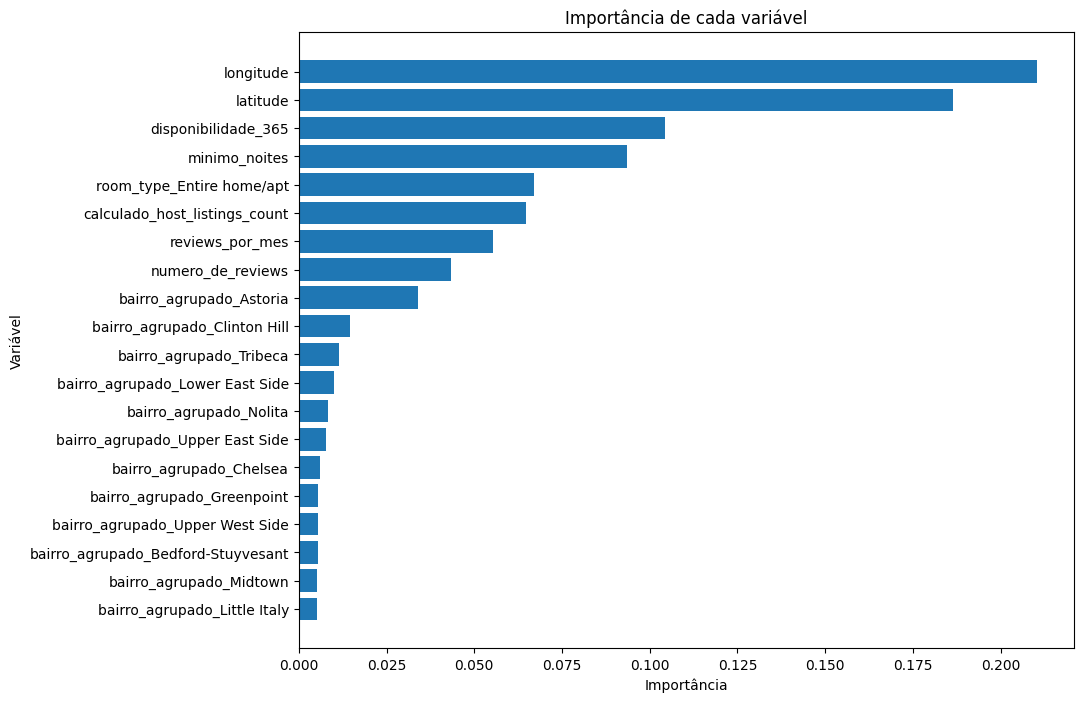

In [251]:
feature_importances = random_forest_model_2.feature_importances_

# Criando um DataFrame para melhor visualização das importâncias
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenando as features pela importância
features = features.sort_values(by='Importance', ascending=False)

# Selecionando as features mais importantes
top_features = features.head(20)

# Exibindo as features mais importantes
print(features)

# Visualizando graficamente
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.title('Importância de cada variável')
plt.gca().invert_yaxis()  # Para ter a feature mais importante no topo
plt.show()

Salvar modelo 2

In [253]:
# modelo2 = random_forest_model_2

# # Salvando o modelo em um arquivo .pkl
# with open('modelo_random_forest_2.pkl', 'wb') as file:
#     pickle.dump(modelo2, file)

In [256]:
# files.download('modelo_random_forest_2.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Modelo 3

Mantendo o 'nome' na análise

In [227]:
# Aplicando One-Hot Encoding para 'bairro_group' e 'room_type'
df_modelo3 = pd.get_dummies(df, columns=['bairro_group', 'room_type'])

# Verificando as novas colunas criadas
print(df_modelo3.columns)

Index(['id', 'nome', 'host_id', 'host_name', 'bairro', 'latitude', 'longitude',
       'price', 'minimo_noites', 'numero_de_reviews', 'ultima_review',
       'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365', 'lucro_anual', 'dias_desde_ultima_review',
       'categoria_preco', 'bairro_group_Bronx', 'bairro_group_Brooklyn',
       'bairro_group_Manhattan', 'bairro_group_Queens',
       'bairro_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')


In [228]:
df_modelo3.drop(columns=['id', 'host_id', 'host_name', 'bairro', 'categoria_preco', 'lucro_anual', 'ultima_review', 'dias_desde_ultima_review'], inplace=True)

In [229]:
df_modelo3.columns

Index(['nome', 'latitude', 'longitude', 'price', 'minimo_noites',
       'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365', 'bairro_group_Bronx', 'bairro_group_Brooklyn',
       'bairro_group_Manhattan', 'bairro_group_Queens',
       'bairro_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [231]:
# Inicializando o TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')

# Fit e transforma a coluna 'nome' para obter a representação TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df_modelo3['nome'])

# Transformando a matriz TF-IDF em um DataFrame para facilitar a manipulação
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [232]:
# Redefinir os índices de ambos os DataFrames para garantir que eles estejam alinhados
df_modelo3.reset_index(drop=True, inplace=True)
tfidf_df.reset_index(drop=True, inplace=True)

In [233]:
# Concatenando com o DataFrame original (excluindo a coluna 'nome' para evitar redundância)
df_modelo3 = pd.concat([df_modelo3.drop(columns=['nome']), tfidf_df], axis=1)

In [234]:
df_modelo3.columns

Index(['latitude', 'longitude', 'price', 'minimo_noites', 'numero_de_reviews',
       'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365', 'bairro_group_Bronx', 'bairro_group_Brooklyn',
       ...
       'townhouse', 'train', 'upper', 'uws', 'view', 'views', 'village',
       'west', 'williamsburg', 'york'],
      dtype='object', length=116)

**Aplicação do Modelo Random Forest**

Dividindo os Dados em Treinamento e Teste

In [235]:
# Definindo X (features) e y (target)
X = df_modelo3.drop('price', axis=1)  # Removendo a coluna de preços para usar como features
y = df_modelo3['price']  # Preços como target

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Treinando o Modelo Random Forest

In [236]:
# Inicializando o modelo Random Forest Regressor
random_forest_model_3 = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 árvores na floresta

# Treinando o modelo com o conjunto de treinamento
random_forest_model_3.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Avaliando a Performance do Modelo

In [237]:
# Fazendo previsões no conjunto de teste
y_pred = random_forest_model_3.predict(X_test)

# Calculando métricas de erro
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 60.4704940165695
MSE: 53498.66624033957
RMSE: 231.2977869335104


In [238]:
apartamento3 = {
    'latitude': 40.75362,
    'longitude': -73.98377,
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355,
    'bairro_group_Bronx': 0,
    'bairro_group_Brooklyn': 0,
    'bairro_group_Manhattan': 1,
    'bairro_group_Queens': 0,
    'bairro_group_Staten Island': 0,
    'room_type_Entire home/apt': 1,
    'room_type_Private room': 0,
    'room_type_Shared room': 0,
    # A partir daqui, todos os TF-IDF features terão 0, exceto se a palavra chave for encontrada no nome do apartamento
}

# Palavras-chave que podem ser derivadas do nome "Skylit Midtown Castle"
palavras_chave = ['skylit', 'midtown', 'castle']

# Adicionando as colunas de características TF-IDF com valor 0
for palavra in list(df_modelo3.columns)[16:]: # Ignorando as primeiras colunas
    apartamento3[palavra] = 1 if palavra in palavras_chave else 0


In [239]:
# Convertendo o dicionário em um DataFrame para corresponder ao formato esperado pelo modelo
apartamento3_df = pd.DataFrame([apartamento3])
apartamento3_df

,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,...,townhouse,train,upper,uws,view,views,village,west,williamsburg,york
0,40.75,-73.98,1,45,0.38,2,355,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [240]:
# Usando o modelo para fazer uma previsão de preço
preco_sugerido = random_forest_model_3.predict(apartamento3_df)

print(f"Preço sugerido: {preco_sugerido[0]}")

Preço sugerido: 266.58


Preço sugerido é de US\$266.58 versus US\$225 do valor real.

O modelo 3 teve um desempenho melhor do que o modelo 1 e o modelo 2.



---



Visualizar a importância das features de um modelo de Random Forest

                      Feature  Importance
1                   longitude        0.11
2               minimo_noites        0.08
0                    latitude        0.07
12  room_type_Entire home/apt        0.07
6         disponibilidade_365        0.06
..                        ...         ...
65                        jfk        0.00
47                       cute        0.00
89                      queen        0.00
90                     queens        0.00
94                     shared        0.00

[115 rows x 2 columns]


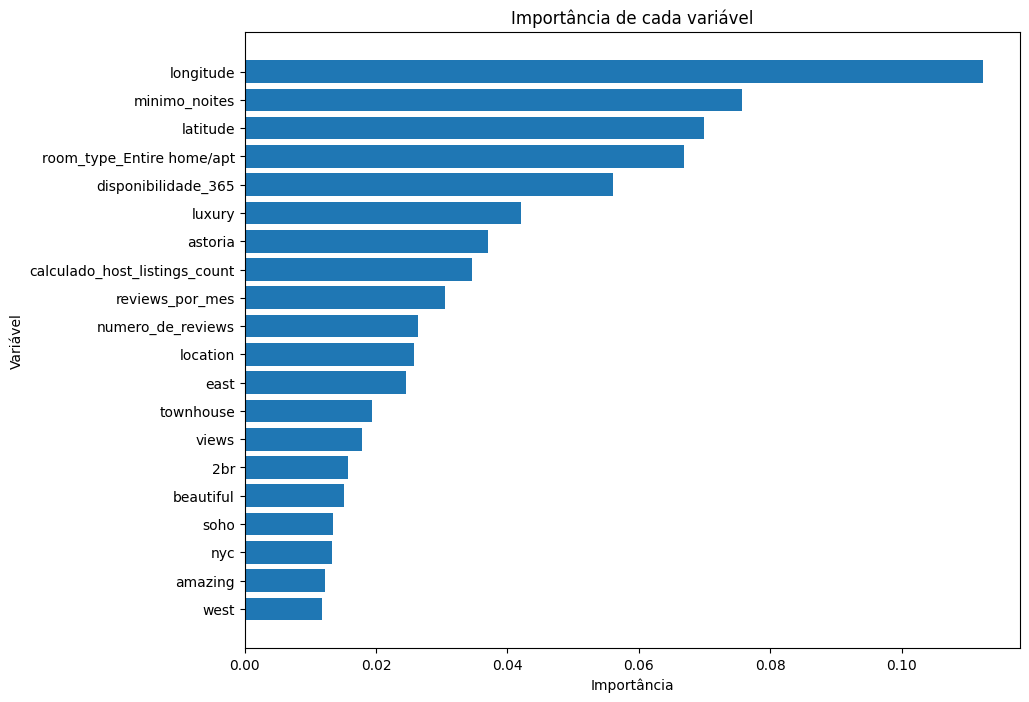

In [243]:
feature_importances = random_forest_model_3.feature_importances_

# Criando um DataFrame para melhor visualização das importâncias
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenando as features pela importância
features = features.sort_values(by='Importance', ascending=False)

# Selecionando as features mais importantes
top_features = features.head(20)

# Exibindo as features mais importantes
print(features)

# Visualizando graficamente
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.title('Importância de cada variável')
plt.gca().invert_yaxis()  # Para ter a feature mais importante no topo
plt.show()

Salvar modelo 3

In [259]:
# modelo3 = random_forest_model_3

# # Salvando o modelo em um arquivo .pkl
# with open('modelo_random_forest_3.pkl', 'wb') as file:
#     pickle.dump(modelo3, file)

In [260]:
# !ls

drive			    modelo_random_forest_2.pkl	sample_data
modelo_random_forest_1.pkl  modelo_random_forest_3.pkl


In [261]:
# files.download('modelo_random_forest_3.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>